# 0. import packages

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import glob

def get_df_for_plot(df, COLLECTION, ITEM_CUT, METRIC):
    
    # get rows where index contains metric
    df_metric = df.loc[df.index.str.contains(METRIC)]

    # filter column and groupby index containing models 
    DATA = COLLECTION+'_'+str(ITEM_CUT)
    df_metric_DATA = df_metric[DATA]
    # groupby index containing each model_names
    metric_len = len(METRIC)
    df_metric_DATA = df_metric_DATA.groupby(df_metric_DATA.index.str.split('_').str[0]) # e.g., NGCF_recall@10 -> NGCF

    # get index
    for group in df_metric_DATA:
        INDEX = group[1].index
    # remove strings before '_' in each item in INDEX    
    INDEX = [i.split('_')[1] for i in INDEX]
    # remove strings before '@' in each item in INDEX
    INDEX = [i.split('@')[1] for i in INDEX]

    # create a dataframe from df_metric_DATA
    # columns are group[0] and index is INDEX
    df_for_plot = {}
    for group in df_metric_DATA:
        df_for_plot[group[0]] = group[1].values

    df_for_plot = pd.DataFrame(df_for_plot, index=INDEX)
    
    return df_for_plot

In [2]:
# get all csv files in the folder 'result_YJ'
file_list = glob.glob('result_plain/' + '*.csv')
# concat all csv files
df = pd.concat([pd.read_csv(f, index_col=0) for f in file_list], axis=1)

# sort column names as alphabetical order
df = df[['azuki_3', 'bayc_3', 'coolcats_3', 'doodles_3', 'meebits_3']]

# save df
df.to_csv('result/NGCF-HPO-new.csv', index=True)
df

# 1. Hyperparameters

In [3]:
AVG_MODE = False

In [4]:
RESULT_PATH = './result/'
COLLECTION_names = ['azuki', 'bayc', 'coolcats', 'doodles', 'meebits']
ITEM_CUT_list = [3]

# RESULT_PATH = './result_benchmarks/'
# COLLECTION_names = ['foursquare_NYC', 'lastfm']
# ITEM_CUT_list = [3]

In [5]:
models_baseline = ['Pop', 'ItemKNN', 'DMF', 'BPR', 'NeuMF']

# NGCF
models_graph = ['NGCF-HPO']
models_graph2 = ['NGCF-HPO-new']
models_HPO = ['NGCFpretrain-img-HPO-new'] 
models_HPO2 = [ 'NGCFpretrain-txt-HPO-new']
models_HPO3 = ['NGCFpretrain-price-HPO-new']

In [6]:
# combine lists
models_to_plot = models_graph2 + models_HPO + models_HPO2 + models_HPO3

In [7]:
# create a dict with models_baseline as keys and 'gray' as values
color_dict = {}

for model in models_baseline:
    color_dict[model] = 'gray'
for model in models_graph:
    color_dict[model] = 'gray'
for model in models_HPO:
    color_dict[model] = 'green'
for model in models_HPO2:
    color_dict[model] = 'red'
for model in models_HPO3:
    color_dict[model] = 'blue'
# for model in models_pretrain_MLP:
#     color_dict[model] = 'red'
# for model in models_concat:
#     color_dict[model] = 'red'

# 2. read and preprocess data

In [8]:
ITEM_CUT = 3

In [9]:
# .csv files are in the folder 'result'
csv_files = glob.glob(RESULT_PATH + '*.csv')
# get strings after '/' and before '.csv' from each file in csv_files
model_names = [file.split('/')[-1].split('.')[0] for file in csv_files]
print('model_names: ', model_names)

# Read all .csv files and collect them in a list
df_list = []
for file in csv_files:
    df = pd.read_csv(file, index_col=0).drop('gauc') # filter in columns containing '_2', drop index containing 'gauc'
    # filter in columns containing '_3'
    df = df[[col for col in df.columns if '_'+str(ITEM_CUT) in col]]
    df_list.append(df)

# create a dict using model_names and df_list 
df_dict = dict(zip(model_names, df_list))     

# append each model_names to each index in each df_list
for key, value in df_dict.items():
    value.index = [key + '_' + i for i in value.index]

# concatenate all dataframes in df_dict
df = pd.concat(df_dict.values(), axis=0)
# drop rows with index containing 50
df = df[~df.index.str.contains('50')]

# get names of evaluation metrics
METRIC_list = df_list[0].index
# remove strings after '@' in each item in metrics
METRIC_list = [i.split('@')[0] for i in METRIC_list]
# remove strings before '_' in each item in metrics
METRIC_list = [i.split('_')[1] for i in METRIC_list]
# extract unique items
METRIC_list = list(set(METRIC_list))
print('METRIC_list: ', METRIC_list)
METRIC_list = ['ndcg', 'recall']

model_names:  ['Pop', 'ItemKNN', 'BPR', 'DMF', 'NeuMF', 'NGCF', 'LightGCN', 'NGCFpretrain-img-noHPO', 'NGCFpretrain-txt-noHPO', 'LightGCNpretrain-img-noHPO', 'LightGCNpretrain-txt-noHPO', 'NGCFconcat-img', 'NGCFconcat-price', 'NGCFconcat-txt', 'LightGCN-HPO', 'NGCFpretrain-img', 'NGCFpretrain-txt', 'LightGCNpretrain-img', 'LightGCNpretrain-txt', 'NGCFpretrain-price', 'LightGCNpretrain-price', 'LightGCNconcat-img', 'LightGCNconcat-price', 'LightGCNconcat-txt', 'NGCF-HPO-max20', 'NGCF-HPO', 'NGCFpretrain-img-bayc-HPO', 'NGCFpretrain-txt-bayc-HPO', 'NGCFpretrain-img-coolcats-HPO', 'NGCFpretrain-txt-coolcats-HPO', 'NGCFpretrain-img-meebits-HPO', 'NGCFpretrain-txt-meebits-HPO', 'NGCFpretrain-img-doodles-HPO', 'NGCFpretrain-txt-doodles-HPO', 'NGCFpretrain-img-azuki-HPO', 'NGCFpretrain-img-HPO', 'NGCFpretrain-txt-HPO', 'NGCFpretrain-txt-azuki-HPO', 'NGCFpretrainMLP-price', 'LightGCNpretrainMLP-img', 'LightGCNpretrainMLP-txt', 'NGCFpretrainMLP-img', 'NGCFpretrainMLP-txt', 'NGCFpretrain-img-HPO

# 3. plot graph

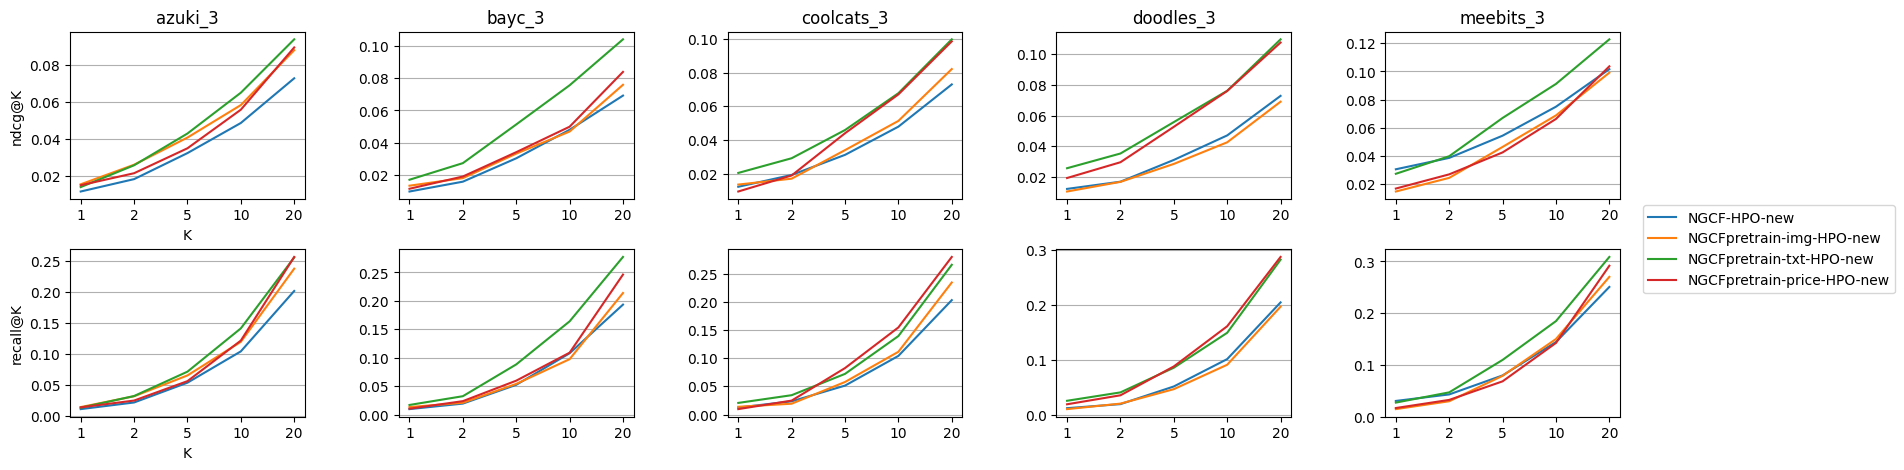

In [10]:
if AVG_MODE == True:
    # 그림 크기 수정
    fig = plt.figure(figsize=(5, 10))
    # 콜렉션 이름 수정
    COLLECTION_names = ['EveryCollection']
else:
    fig = plt.figure(figsize=(20, 5))

# create a grid
len_row = len(METRIC_list)
len_col = len(COLLECTION_names)*len(ITEM_CUT_list)
grid = plt.GridSpec(len_row, len_col, wspace=0.4, hspace=0.3)

for COLLECTION in COLLECTION_names:
    for ITEM_CUT in ITEM_CUT_list:
        for METRIC in METRIC_list:
            
            if AVG_MODE == True:
                # 모든 데이터셋 평균 취하기
                # take average over all columns
                df = df.mean(axis=1)
                df = pd.DataFrame(df, columns=[f'EveryCollection_{ITEM_CUT}'])
                # 콜렉션 이름 수정
                COLLECTION_names = ['EveryCollection']
            
            df_for_plot = get_df_for_plot(df, COLLECTION, ITEM_CUT, METRIC)
            # pick models
            df_for_plot = df_for_plot[models_to_plot]
            
            df_for_plot.plot.line(title=COLLECTION+'_'+str(ITEM_CUT), legend=False, 
                                ax=fig.add_subplot(grid[METRIC_list.index(METRIC), COLLECTION_names.index(COLLECTION)*len(ITEM_CUT_list)+ITEM_CUT_list.index(ITEM_CUT)]) )
                                # color = color_dict)

            # add grid lines
            plt.grid(axis='y')
            
            # only for the first iteration of for loops
            if (COLLECTION == COLLECTION_names[0]):
                # set y-axis label
                plt.ylabel(METRIC+'@K')
                # set x-axis label
                plt.xlabel('K')
                
            # only for the first iteration of for loops
            if (COLLECTION == COLLECTION_names[-1]) and (ITEM_CUT == ITEM_CUT_list[-1]) and (METRIC == METRIC_list[-1]):
                # legend position is outside of the figure
                plt.legend(loc='center right', bbox_to_anchor=(2.2, 1))

            
    # empty title
    plt.title('')

# 4. table

In [11]:
METRIC_list:  ['map', 'recall', 'ndcg', 'precision', 'hit', 'mrr']

# filter rows containing 'map' and '@10' in index
df_map = df[df.index.str.contains('map') & df.index.str.contains('@10')]
# filter rows containing 'recall' in index
df_recall = df[df.index.str.contains('recall') & df.index.str.contains('@10')]
# filter rows containing 'ndcg' in index
df_ndcg = df[df.index.str.contains('ndcg') & df.index.str.contains('@10')]
# filter rows containing 'precision' in index
df_precision = df[df.index.str.contains('precision') & df.index.str.contains('@10')]
# filter rows containing 'hit' in index
df_hit = df[df.index.str.contains('hit') & df.index.str.contains('@10')]
# filter rows containing 'mrr' in index
df_mrr = df[df.index.str.contains('mrr') & df.index.str.contains('@10')]


# display more rows
pd.set_option('display.max_rows', 1000)
# color df_mrr
df_mrr.style.background_gradient(cmap='Blues')


,azuki_3,bayc_3,coolcats_3,doodles_3,meebits_3
Pop_mrr@10,0.019900,0.033400,0.024600,0.023200,0.016400
ItemKNN_mrr@10,0.032500,0.040800,0.031400,0.033900,0.049300
BPR_mrr@10,0.027600,0.018600,0.032400,0.028200,0.039200
DMF_mrr@10,0.031200,0.027700,0.034600,0.032800,0.032600
NeuMF_mrr@10,0.024900,0.022200,0.026500,0.027200,0.034100
NGCF_mrr@10,0.030100,0.028400,0.022000,0.029200,0.043500
LightGCN_mrr@10,0.026600,0.026300,0.030100,0.028000,0.039400
NGCFpretrain-img-noHPO_mrr@10,0.027700,0.023200,0.026600,0.031800,0.038000
NGCFpretrain-txt-noHPO_mrr@10,0.028500,0.024500,0.025000,0.027900,0.040700
LightGCNpretrain-img-noHPO_mrr@10,0.020700,0.018600,0.023300,0.026000,0.033000


In [26]:
combined_df = pd.DataFrame()

for name, df in df_dict.items():
    # get row where index contains 'recall@10'
    df_recall = df.loc[df.index.str.contains('recall@10')]
    # get row where index contains 'ndcg@10'
    df_ndcg = df.loc[df.index.str.contains('ndcg@10')]
    # combine with combined_df
    combined_df = pd.concat([combined_df, df_recall, df_ndcg])

In [27]:
# combined_df
# filter in columns containing '_0'
combined_df = combined_df.filter(regex='_0')

# take mean over all columns
combined_df = combined_df.mean(axis=1)

# convert to dataframe
combined_df = pd.DataFrame(combined_df, columns=[f'EveryCollection_{ITEM_CUT}'])

# split dataframe 
# one for recall, one for ndcg
combined_df_recall = combined_df.loc[combined_df.index.str.contains('recall')]
combined_df_ndcg = combined_df.loc[combined_df.index.str.contains('ndcg')]

In [28]:
# color combined_df by value
combined_df.style.background_gradient(cmap='Blues')

,EveryCollection_3
Pop_recall@10,0.064760
Pop_ndcg@10,0.028160
ItemKNN_recall@10,0.105980
ItemKNN_ndcg@10,0.052220
BPR_recall@10,0.097860
BPR_ndcg@10,0.044680
DMF_recall@10,0.102740
DMF_ndcg@10,0.047280
NeuMF_recall@10,0.086160
NeuMF_ndcg@10,0.038900


In [8]:
combined_df_recall

# color dataframe by values
combined_df_recall.style.background_gradient(cmap='Blues')

,EveryCollection_0
NGCF_recall@10,0.064760
LightGCN_recall@10,0.105980
MyNGCF-img_recall@10,0.097860
MyNGCF-txt_recall@10,0.102740
MyLightGCN-img_recall@10,0.086160
MyLightGCN-txt_recall@10,0.093060


In [9]:
combined_df_ndcg

# color dataframe by values
combined_df_ndcg.style.background_gradient(cmap='Blues')

,EveryCollection_0
NGCF_ndcg@10,0.028160
LightGCN_ndcg@10,0.052220
MyNGCF-img_ndcg@10,0.044680
MyNGCF-txt_ndcg@10,0.047280
MyLightGCN-img_ndcg@10,0.038900
MyLightGCN-txt_ndcg@10,0.042060


# more tables

In [ ]:
# collect all csv files in folder 'result_new'
path = r'result_new' # use your path
all_files = glob.glob(path + "/*.csv")


file_dict = {}
for filename in all_files:
    model_name = filename.split('/')[1][:-4]
    df = pd.read_csv(filename, index_col=0, header=0)
    # leave only the columns containing '_3'
    df = df.filter(regex='_3')
    # leave only the indices containing 'recall@20' and 'ndcg@20'
    df = df.loc[['recall@20']]
    # append model_name to indices
    # df.index = [model_name + '_' + index for index in df.index]
    
    file_dict[model_name] = df

# append all dataframes in file_dict to one dataframe
df = pd.concat(file_dict, axis=0)
# sort the first index of multiindex
# sort the indices as ['Pop', 'ItemKNN', 'DMF', 'NeuMF', 'NGCF', 'NGCF-img', 'NGCF-txt64', 'NGCF-price', 'NGCF-all64']
df = df.reindex(['Pop', 'ItemKNN', 'DMF', 'NeuMF', 'NGCF', 'NGCF-img', 'NGCF-txt64', 'NGCF-price', 'NGCF-all64'], level=0)
# visualize dataframe by values along columns
df.style.background_gradient(cmap='Blues', axis=0)

,,azuki_3,bayc_3,coolcats_3,doodles_3,meebits_3
Pop,recall@20,0.141200,0.207800,0.155000,0.154000,0.157100
ItemKNN,recall@20,0.197500,0.245200,0.224300,0.196900,0.229900
DMF,recall@20,0.200500,0.193400,0.228600,0.200100,0.193600
NeuMF,recall@20,0.183900,0.199600,0.168800,0.196400,0.193100
NGCF,recall@20,0.202000,0.193400,0.202900,0.205100,0.250700
NGCF-img,recall@20,0.238000,0.213800,0.234200,0.197300,0.270200
NGCF-txt64,recall@20,0.224500,0.344700,0.354900,0.248700,0.306300
NGCF-price,recall@20,0.256900,0.246200,0.279500,0.288000,0.291700
NGCF-all64,recall@20,0.289600,0.311200,0.359700,0.277100,0.355200


In [ ]:
# collect all csv files in folder 'result_new'
path = r'result_new' # use your path
all_files = glob.glob(path + "/*.csv")


file_dict = {}
for filename in all_files:
    model_name = filename.split('/')[1][:-4]
    df = pd.read_csv(filename, index_col=0, header=0)
    # leave only the columns containing '_3'
    df = df.filter(regex='_3')
    # leave only the indices containing 'recall@20' and 'ndcg@20'
    df = df.loc[['ndcg@20']]
    # append model_name to indices
    # df.index = [model_name + '_' + index for index in df.index]
    
    file_dict[model_name] = df

# append all dataframes in file_dict to one dataframe
df = pd.concat(file_dict, axis=0)
# sort the first index of multiindex
# sort the indices as ['Pop', 'ItemKNN', 'DMF', 'NeuMF', 'NGCF', 'NGCF-img', 'NGCF-txt64', 'NGCF-price', 'NGCF-all64']
df = df.reindex(['Pop', 'ItemKNN', 'DMF', 'NeuMF', 'NGCF', 'NGCF-img', 'NGCF-txt64', 'NGCF-price', 'NGCF-all64'], level=0)
# visualize dataframe by values along columns
df.style.background_gradient(cmap='Blues', axis=0)

,,azuki_3,bayc_3,coolcats_3,doodles_3,meebits_3
Pop,ndcg@20,0.049100,0.074900,0.056300,0.054800,0.050200
ItemKNN,ndcg@20,0.072200,0.089900,0.078200,0.073300,0.093400
DMF,ndcg@20,0.072100,0.067000,0.081200,0.073200,0.071600
NeuMF,ndcg@20,0.063300,0.064600,0.060800,0.067700,0.072900
NGCF,ndcg@20,0.072800,0.069200,0.073000,0.072900,0.101600
NGCF-img,ndcg@20,0.088000,0.075900,0.082100,0.069100,0.099100
NGCF-txt64,ndcg@20,0.081900,0.128900,0.122800,0.090500,0.114000
NGCF-price,ndcg@20,0.089500,0.083900,0.098500,0.107700,0.103600
NGCF-all64,ndcg@20,0.106800,0.106500,0.141100,0.103300,0.145900


In [ ]:
# collect all csv files in folder 'result_new'
path = r'result_new' # use your path
all_files = glob.glob(path + "/*.csv")


file_dict = {}
for filename in all_files:
    model_name = filename.split('/')[1][:-4]
    df = pd.read_csv(filename, index_col=0, header=0)
    # leave only the columns containing '_3'
    df = df.filter(regex='_3')
    # leave only the indices containing 'recall@20' and 'ndcg@20'
    df = df.loc[['recall@20']]
    # append model_name to indices
    # df.index = [model_name + '_' + index for index in df.index]
    # mean dataframe
    df = df.mean(axis=1)
    
    file_dict[model_name] = df

# append all dataframes in file_dict to one dataframe
df = pd.concat(file_dict, axis=0)
# sort the first index of multiindex
# sort the indices as ['Pop', 'ItemKNN', 'DMF', 'NeuMF', 'NGCF', 'NGCF-img', 'NGCF-txt64', 'NGCF-price', 'NGCF-all64']
df = df.reindex(['Pop', 'ItemKNN', 'DMF', 'NeuMF', 'NGCF', 'NGCF-img', 'NGCF-txt64', 'NGCF-price', 'NGCF-all64'], level=0)
# visualize dataframe by values along columns
df = pd.DataFrame(df, columns=['average'])
df.style.background_gradient(cmap='Blues', axis=0)

,,average
Pop,recall@20,0.163020
ItemKNN,recall@20,0.218760
DMF,recall@20,0.203240
NeuMF,recall@20,0.188360
NGCF,recall@20,0.210820
NGCF-img,recall@20,0.230700
NGCF-txt64,recall@20,0.295820
NGCF-price,recall@20,0.272460
NGCF-all64,recall@20,0.318560


In [ ]:
# collect all csv files in folder 'result_new'
path = r'result_new' # use your path
all_files = glob.glob(path + "/*.csv")


file_dict = {}
for filename in all_files:
    model_name = filename.split('/')[1][:-4]
    df = pd.read_csv(filename, index_col=0, header=0)
    # leave only the columns containing '_3'
    df = df.filter(regex='_3')
    # leave only the indices containing 'recall@20' and 'ndcg@20'
    df = df.loc[['ndcg@20']]
    # append model_name to indices
    # df.index = [model_name + '_' + index for index in df.index]
    # mean dataframe
    df = df.mean(axis=1)
    
    file_dict[model_name] = df

# append all dataframes in file_dict to one dataframe
df = pd.concat(file_dict, axis=0)
# sort the first index of multiindex
# sort the indices as ['Pop', 'ItemKNN', 'DMF', 'NeuMF', 'NGCF', 'NGCF-img', 'NGCF-txt64', 'NGCF-price', 'NGCF-all64']
df = df.reindex(['Pop', 'ItemKNN', 'DMF', 'NeuMF', 'NGCF', 'NGCF-img', 'NGCF-txt64', 'NGCF-price', 'NGCF-all64'], level=0)
# visualize dataframe by values along columns
df = pd.DataFrame(df, columns=['average'])
df.style.background_gradient(cmap='Blues', axis=0)

,,average
Pop,ndcg@20,0.057060
ItemKNN,ndcg@20,0.081400
DMF,ndcg@20,0.073020
NeuMF,ndcg@20,0.065860
NGCF,ndcg@20,0.077900
NGCF-img,ndcg@20,0.082840
NGCF-txt64,ndcg@20,0.107620
NGCF-price,ndcg@20,0.096640
NGCF-all64,ndcg@20,0.120720


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import glob

def get_df_for_plot(df, COLLECTION, ITEM_CUT, METRIC):
    
    # get rows where index contains metric
    df_metric = df.loc[df.index.str.contains(METRIC)]

    # filter column and groupby index containing models 
    DATA = COLLECTION +'_'+str(ITEM_CUT)
    df_metric_DATA = df_metric[DATA]
    # groupby index containing each model_names
    metric_len = len(METRIC)
    df_metric_DATA = df_metric_DATA.groupby(df_metric_DATA.index.str.split('_').str[0]) # e.g., NGCF_recall@10 -> NGCF

    # get index
    for group in df_metric_DATA:
        INDEX = group[1].index  # INDEX 예시: 'NGCFpretrain_ndcg@10'
    
    # remove strings before '_' in each item in INDEX    
    INDEX = [i.split('_')[1] for i in INDEX]
    # remove strings before '@' in each item in INDEX
    INDEX = [i.split('@')[1] for i in INDEX]

    # create a dataframe from df_metric_DATA
    # columns are group[0] and index is INDEX
    df_for_plot = {}
    for group in df_metric_DATA:
        df_for_plot[group[0]] = group[1].values

    df_for_plot = pd.DataFrame(df_for_plot, index=INDEX)
    
    return df_for_plot

In [ ]:
# # get all csv files in the folder 'result_YJ'
# file_list = glob.glob('result_to/' + '*.csv')
# # concat all csv files
# df = pd.concat([pd.read_csv(f, index_col=0) for f in file_list], axis=1)

# # sort column names as alphabetical order
# df = df[['azuki', 'bayc', 'coolcats', 'doodles', 'meebits']]
# # rename columns
# df.rename(columns={'azuki':'azuki_3', 'bayc':'bayc_3', 'coolcats':'coolcats_3', 'doodles':'doodles_3', 'meebits':'meebits_3'}, inplace=True)

# # save df
# df.to_csv('result_to_plot/NGCFpretrain_all64_price1.csv', index=True)
# df